In [26]:
from tensorflow import keras

In [27]:
# h5 model 불러오기
model = keras.models.load_model("./Data/best_cnn_model.h5")

# model layer 확인
model.layers

### kernel size(3,3)으로 구성한 이미지 보기

In [28]:
# 32개의 노드로 구성된 layer 선택
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [29]:
# 가중치 보기
conv_weights = conv.weights[0].numpy()
print('가중치 평균 :',conv_weights.mean(),'가중치 표준편차 :',conv_weights.std())

가중치 평균 : -0.0313681 가중치 표준편차 : 0.26512164


In [30]:
import matplotlib.pyplot as plt

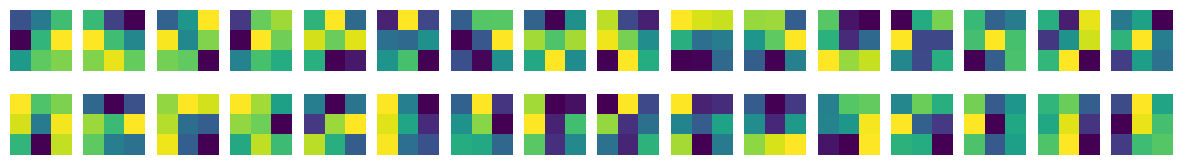

In [31]:
# 이미지 확인하기
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i,j].axis('off')
plt.show()

### 특성맵 시각화

In [32]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [33]:
# model 불러오기
conv_acti = keras.models.Model(model.input, model.layers[0].output)
conv_acti

In [34]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

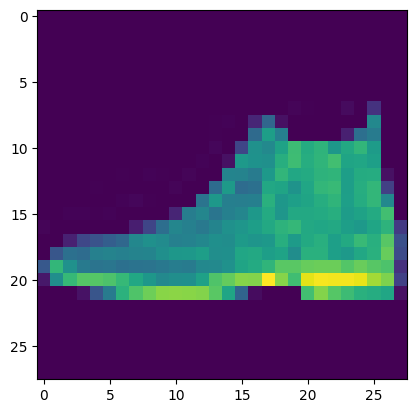

In [35]:
# 이미지
plt.imshow(test_input[0].reshape(28,28))
plt.show()

In [40]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)
feature_maps.shape

1/1 [==============================] - 0s 7ms/step


(1, 28, 28, 32)

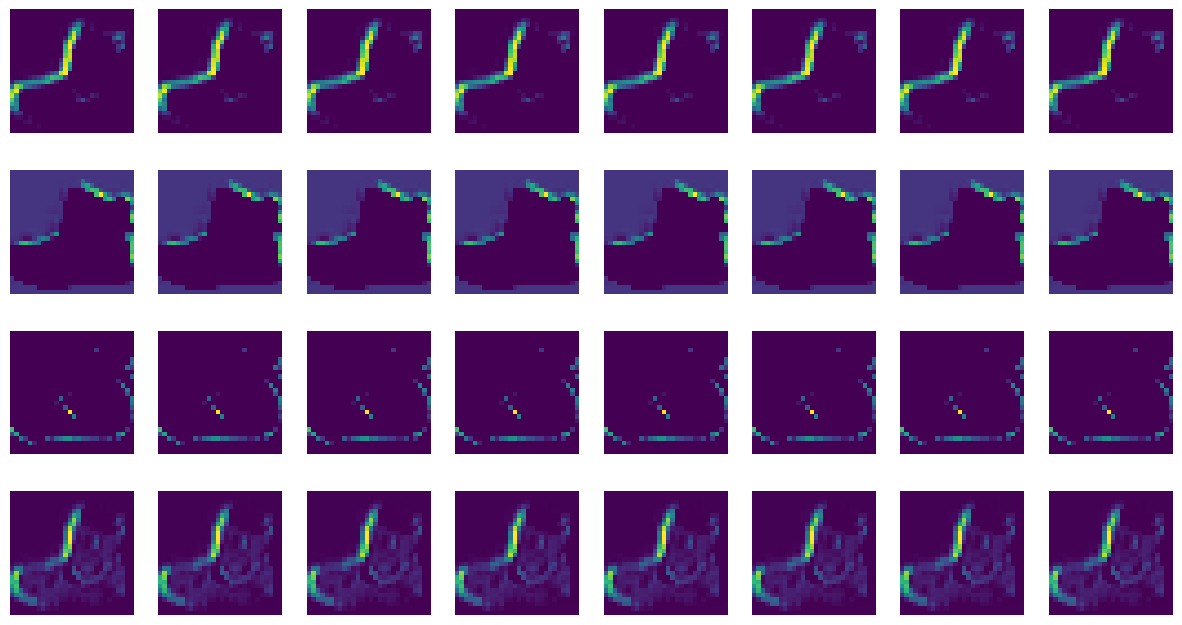

In [47]:
# 이미지 확인하기
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i])
        axs[i,j].axis('off')
plt.show()